# Testing with user input

In [18]:
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [19]:
label_file = "digit_labels.csv"
img_files = glob.glob('Test Images/*')
filename = "Test Images/digits_1.jpeg"

In [20]:
images = []
for f in img_files:
    with Image.open(f) as img:
        img.load()
        images.append(img)

In [4]:
images

[<PIL.MpoImagePlugin.MpoImageFile image mode=RGB size=2978x3973>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1791x2393>]

In [5]:
len(images)

2

In [6]:
transformed_images = []
for k in range(len(images)):
    img = images[k]
    step_w = img.size[0]/4
    step_h = img.size[1]/4

    for i in range(0,4):
        for j in range(0,4):
            transformed_img = img.crop((i*step_w, j*step_h, (i+1)*step_w, (j+1)*step_h)).crop((step_w/8, step_h/8, 3*step_w/4, 3*step_h/4)).convert("L")
            transformed_img = ImageOps.invert(transformed_img)
            transformed_img = transformed_img.resize((28,28))
            transformed_images.append(transformed_img)

In [7]:
len(transformed_images)

32

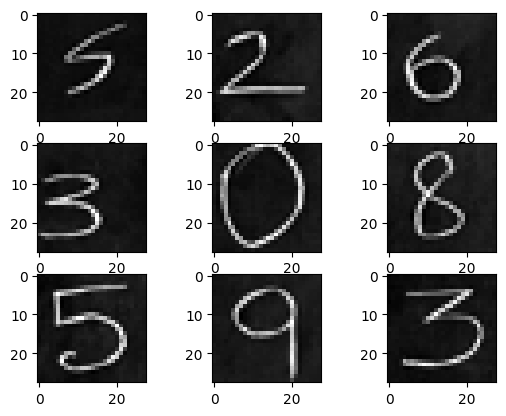

In [8]:
for i in range(9):
    plt.subplot(int('33' + str(i+1)))
    plt.imshow(transformed_images[i], cmap = plt.get_cmap('gray'))

In [9]:
from keras.models import load_model

model = load_model('cnn_model.h5')

2022-12-13 23:13:11.484230: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 23:13:11.630423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-13 23:13:11.630458: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-13 23:13:11.665819: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-13 23:13:13.494635: W tensorflow/stream_executor/pla

In [10]:
def normalize_meanstd(a, axis=None): 
    # axis param denotes axes along which mean & std reductions are to be performed
    mean = np.mean(a, axis=axis, keepdims=True)
    std = np.sqrt(((a - mean)**2).mean(axis=axis, keepdims=True))
    return (a - mean) / std

In [11]:
X_test = np.array([normalize_meanstd(np.array(p)) for p in transformed_images])
X_test = X_test.reshape(len(transformed_images),28,28,1).astype("float32")
X_test.shape

(32, 28, 28, 1)

In [12]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 252ms/step


In [13]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [14]:
y_pred_classes

array([9, 2, 9, 3, 0, 8, 5, 9, 3, 6, 1, 4, 7, 4, 7, 1, 0, 9, 3, 4, 4, 8,
       7, 2, 8, 2, 7, 5, 7, 5, 8, 6])

In [15]:
y_act_classes_1 = np.array([0,9,3,4,4,6,7,2,8,2,1,5,1,5,8,6])
y_act_classes_2 = np.array([5,2,6,3,0,8,5,9,3,6,1,4,7,9,7,0])
y_act_classes = np.append(y_act_classes_2,y_act_classes_1)

In [16]:
confusion_matrix(y_act_classes, y_pred_classes)

array([[2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 2, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 2]])

In [17]:
accuracy_score(y_act_classes, y_pred_classes)

0.78125

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62bfbc7a-56e8-416a-a6e5-2c8f44c699f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>